##  First Jupyter notebook, 
### for Seattle Cycle Share data on kaggle

### Part 1 - Exploring the data  ------------------------------------------

In [1]:
import pandas as pd

df_sta = pd.read_csv('station.csv')

df_weather = pd.read_csv('weather.csv')

df_trips = pd.read_csv('trip.csv', skiprows=[50793])

In [2]:
df_sta.columns

Index(['station_id', 'name', 'lat', 'long', 'install_date',
       'install_dockcount', 'modification_date', 'current_dockcount',
       'decommission_date'],
      dtype='object')

In [3]:
df_trips.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [4]:
len(df_trips.trip_id)

286857

In [32]:
len(pd.unique(df_trips.trip_id))

236065

In [33]:
df_trips.groupby(by='from_station_name').trip_id.count().sort_values(ascending = False).head(10)

from_station_name
Pier 69 / Alaskan Way & Clay St           13054
E Pine St & 16th Ave                      11392
3rd Ave & Broad St                        10934
2nd Ave & Pine St                         10049
Westlake Ave & 6th Ave                     9994
E Harrison St & Broadway Ave E             9639
Cal Anderson Park / 11th Ave & Pine St     9468
REI / Yale Ave N & John St                 8382
2nd Ave & Vine St                          8168
15th Ave E & E Thomas St                   7680
Name: trip_id, dtype: int64

In [34]:
df_trips[df_trips.from_station_name =='Pier 69 / Alaskan Way & Clay St'].trip_id.count()      # checking..

13054

In [11]:
df_trips.groupby(by='gender').trip_id.count().sort_values(ascending=False)

gender
Male      140564
Female     37562
Other       3431
Name: trip_id, dtype: int64

In [13]:
df_trips[df_trips.gender=='Male'].trip_id.count()   # checking

140564

In [15]:
df_weather.columns

Index(['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Events'],
      dtype='object')

In [16]:
df_weather.Date.min()

'1/1/2015'

In [17]:
df_weather.Date.max()

'9/9/2015'

In [27]:
df_weather.Date.describe()

count            689
unique           689
top       10/26/2014
freq               1
Name: Date, dtype: object

In [25]:
df_weather.Date.head(10)

0    10/13/2014
1    10/14/2014
2    10/15/2014
3    10/16/2014
4    10/17/2014
5    10/18/2014
6    10/19/2014
7    10/20/2014
8    10/21/2014
9    10/22/2014
Name: Date, dtype: object

In [24]:
df_weather.Date.tail(10)

679    8/22/2016
680    8/23/2016
681    8/24/2016
682    8/25/2016
683    8/26/2016
684    8/27/2016
685    8/28/2016
686    8/29/2016
687    8/30/2016
688    8/31/2016
Name: Date, dtype: object

In [35]:
df_weather.groupby(by='Mean_Temperature_F').Date.count().sort_values(ascending = False).head(10)

Mean_Temperature_F
52.0    43
48.0    42
66.0    39
60.0    39
50.0    37
58.0    35
54.0    30
56.0    29
64.0    26
68.0    23
Name: Date, dtype: int64

In [38]:
df_weather.groupby(by='Precipitation_In').Date.count().head(20)    

Precipitation_In
0.00    395
0.01     36
0.02     18
0.03     15
0.04     11
0.05     12
0.06     10
0.07     10
0.08      4
0.09      9
0.10      6
0.11      8
0.12     10
0.13      6
0.14      3
0.15      6
0.16      6
0.17      2
0.18      4
0.19      2
Name: Date, dtype: int64

In [81]:
df_weather[(df_weather.Precipitation_In > 0) & (df_weather.Precipitation_In < 0.10)].Date.count()

125

In [82]:
df_weather[(df_weather.Precipitation_In > 0.10) & (df_weather.Precipitation_In < 0.20)].Date.count()

47

In [83]:
df_weather[(df_weather.Precipitation_In > 0.20) & (df_weather.Precipitation_In < 0.30)].Date.count()

24

In [86]:
df_weather[(df_weather.Precipitation_In > 0.30)].Date.count()

85

### Captain Graphical. 
#### Separate out while ironing out any kinks

In [40]:
%matplotlib inline
import seaborn as sns

In [43]:
sns.set(style="darkgrid")

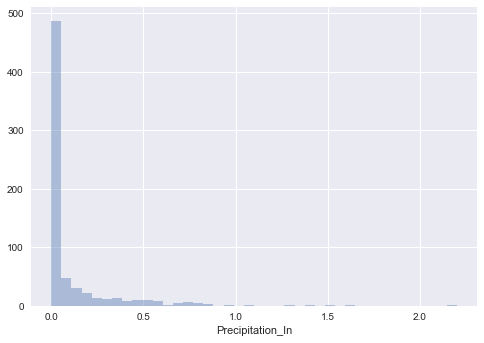

In [52]:
sns.distplot(df_weather.Precipitation_In, bins = 40 , kde=False)

In [58]:
# notes. need to redo 

# w = df_weather.groupby(by='Mean_Temperature_F').Date.count()
# w.describe()
# sns.distplot(w, bins = 10, kde = False)

# g = df_trips.groupby(by='gender').trip_id.count()
# sns.distplot(g)

### Part 2 - Counting trips  ---------------------------------------------- 

In [38]:
df_num_tr = pd.DataFrame(index=df_sta.station_id, # trip count
                columns=df_sta.station_id)        # not controlling for weather

In [39]:
for i in df_sta.station_id:                 # from
    for j in df_sta.station_id:             # to 
        df_num_tr[i][j] = len(df_trips[(df_trips.from_station_id==i) & 
        (df_trips.to_station_id==j)].trip_id)